# Review Sentiment Scoring System

In [1]:
import pandas as pd
data = pd.read_excel(r"file:///Users/amanurrahman/Documents/DataAnalysis/Case_Study_Data.xlsx")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import string
import re

# Check the null values

In [3]:
data.head(5)

,review_id,title,body,language_tag
0,0005a78694dd00f0dfeb624463e76570eba41ed154ac4e...,Sehr gut,"Pros: Sehr freundliche Gastgeberin, sehr gutes...",de
1,000f4a62978397ea0b2c4595848d4179472c56eaab49a7...,NaN,It’s really good.,en
2,001c6bcda3b8b3170514df1e9d472ee2db97c70862ed6a...,NaN,"The rooms were of an excellent size, the beds ...",en
3,001f646ede0982c3199e6bada1d1cb9ce81cf565b77869...,The best and only place we love in Boracay,"Amenities, transpo, food and staff �����������...",en
4,002621fd1054318f8dd01dbd6345e6446fd2a47cfed909...,Superb Stay,"Nice infinity pool, private beach, friendly st...",en


In [4]:
data.shape

(10089, 4)

In [5]:
data.isnull().sum()

review_id          0
title           3398
body               5
language_tag       0
dtype: int64

In [6]:
data['body'].dropna()

0        Pros: Sehr freundliche Gastgeberin, sehr gutes...
1                                        It’s really good.
2        The rooms were of an excellent size, the beds ...
3        Amenities, transpo, food and staff �����������...
4        Nice infinity pool, private beach, friendly st...
                               ...                        
10084    It was very nice, the piano bar in the lobby w...
10085                                      Pros: - Cons: -
10086    The Cow is well worth a visit. Loved our room,...
10087    Staff top notch. Welcoming and courteous. Fron...
10088    Just ok , bathroom was flooding like most bayv...
Name: body, Length: 10084, dtype: object

In [7]:
data.dtypes

review_id       object
title           object
body            object
language_tag    object
dtype: object

In [8]:
data.isnull().sum()

review_id          0
title           3398
body               5
language_tag       0
dtype: int64

# Change the datatype to text

In [9]:
data['body'] = data["body"].astype(str)

# Lowercase the all review

In [10]:
#Lowercase all reviews

data['body'] = data["body"].apply(lambda x: x.lower())


# Remove special character 

In [11]:
data['language_tag'].nunique()

33

In [12]:
data_eng= data[data['language_tag'] == "en"]

In [13]:
data_eng.shape

(7039, 4)

In [14]:
data_eng.shape[0]/data.shape[0]

0.6976905540687878

In [15]:
import re
import string

def remove_non_english(text):
#     english_text = re.sub(f'[^{string.printable}]', '', text)
    english_text = re.sub('[^\w\s]', '', str(text))
    return english_text

# Apply remove_non_english() function to each row in the 'body' column
data_eng['body'] = data_eng['body'].apply(remove_non_english)

/var/folders/1m/plzr34wx36v6ywn7d6m3ctc00000gn/T/ipykernel_63851/3692132454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eng['body'] = data_eng['body'].apply(remove_non_english)


In [16]:
data_eng.head()

,review_id,title,body,language_tag
1,000f4a62978397ea0b2c4595848d4179472c56eaab49a7...,NaN,its really good,en
2,001c6bcda3b8b3170514df1e9d472ee2db97c70862ed6a...,NaN,the rooms were of an excellent size the beds c...,en
3,001f646ede0982c3199e6bada1d1cb9ce81cf565b77869...,The best and only place we love in Boracay,amenities transpo food and staff,en
4,002621fd1054318f8dd01dbd6345e6446fd2a47cfed909...,Superb Stay,nice infinity pool private beach friendly staf...,en
5,00285feb6703b5c4ca3f068027a7ee5d227f6a59890ade...,Great Staff but needs serious cleaning,hotel staff was great everyone was courteous a...,en


# Remove the stopwords

In [17]:
# stop words

stop_words=stopwords.words('english')

data_eng['body']= data_eng['body'].apply(lambda x:x if x not in stop_words else None)

/var/folders/1m/plzr34wx36v6ywn7d6m3ctc00000gn/T/ipykernel_63851/16261843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eng['body']= data_eng['body'].apply(lambda x:x if x not in stop_words else None)


In [18]:
data_eng.head(5)

,review_id,title,body,language_tag
1,000f4a62978397ea0b2c4595848d4179472c56eaab49a7...,NaN,its really good,en
2,001c6bcda3b8b3170514df1e9d472ee2db97c70862ed6a...,NaN,the rooms were of an excellent size the beds c...,en
3,001f646ede0982c3199e6bada1d1cb9ce81cf565b77869...,The best and only place we love in Boracay,amenities transpo food and staff,en
4,002621fd1054318f8dd01dbd6345e6446fd2a47cfed909...,Superb Stay,nice infinity pool private beach friendly staf...,en
5,00285feb6703b5c4ca3f068027a7ee5d227f6a59890ade...,Great Staff but needs serious cleaning,hotel staff was great everyone was courteous a...,en


# Apply steaming - remove s, és

In [19]:
# stemming

def stemming(x):
    st = PorterStemmer()
    stemmed_words = [] 
    if x is not None:
       for word in x.split():
              stemmed_words.append(st.stem(word))
    return ' '.join(stemmed_words)

data_eng['body'].apply(lambda x:stemming(x))

1                                           it realli good
2        the room were of an excel size the bed confort...
3                              amen transpo food and staff
4        nice infin pool privat beach friendli staff ni...
5        hotel staff wa great everyon wa courteou and f...
                               ...                        
10083    everyth wa excel except for the paper thin wal...
10084    it wa veri nice the piano bar in the lobbi wa ...
10086    the cow is well worth a visit love our room cl...
10087    staff top notch welcom and courteou front desk...
10088    just ok bathroom wa flood like most bayview an...
Name: body, Length: 7039, dtype: object

In [20]:
data_eng.head()

,review_id,title,body,language_tag
1,000f4a62978397ea0b2c4595848d4179472c56eaab49a7...,NaN,its really good,en
2,001c6bcda3b8b3170514df1e9d472ee2db97c70862ed6a...,NaN,the rooms were of an excellent size the beds c...,en
3,001f646ede0982c3199e6bada1d1cb9ce81cf565b77869...,The best and only place we love in Boracay,amenities transpo food and staff,en
4,002621fd1054318f8dd01dbd6345e6446fd2a47cfed909...,Superb Stay,nice infinity pool private beach friendly staf...,en
5,00285feb6703b5c4ca3f068027a7ee5d227f6a59890ade...,Great Staff but needs serious cleaning,hotel staff was great everyone was courteous a...,en


In [21]:
# data_eng.head(10)

In [22]:
# data_eng.Sentiment_score

In [23]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

data_eng["sentiments"] = data['body'].apply(lambda x: sid.polarity_scores(x))
data_eng = pd.concat([data_eng.drop(['sentiments'], axis=1), data_eng['sentiments'].apply(pd.Series)], axis=1)

/var/folders/1m/plzr34wx36v6ywn7d6m3ctc00000gn/T/ipykernel_63851/4182180215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eng["sentiments"] = data['body'].apply(lambda x: sid.polarity_scores(x))


In [24]:
data_eng.head(4)

,review_id,title,body,language_tag,neg,neu,pos,compound
1,000f4a62978397ea0b2c4595848d4179472c56eaab49a7...,NaN,its really good,en,0.0,0.385,0.615,0.4927
2,001c6bcda3b8b3170514df1e9d472ee2db97c70862ed6a...,NaN,the rooms were of an excellent size the beds c...,en,0.0,0.695,0.305,0.9490
3,001f646ede0982c3199e6bada1d1cb9ce81cf565b77869...,The best and only place we love in Boracay,amenities transpo food and staff,en,0.0,1.000,0.000,0.0000
4,002621fd1054318f8dd01dbd6345e6446fd2a47cfed909...,Superb Stay,nice infinity pool private beach friendly staf...,en,0.0,0.569,0.431,0.9022


# Count the text length of each review

In [25]:
data_eng['text_length'] = data_eng['body'].apply(lambda x: len(x) if x is not None else 0)

#  Count the number of words in each review

In [26]:
data_eng['word_count'] = data_eng['body'].apply(lambda x: len(str(x).split()))


In [27]:
data_eng.head(5)

,review_id,title,body,language_tag,neg,neu,pos,compound,text_length,word_count
1,000f4a62978397ea0b2c4595848d4179472c56eaab49a7...,NaN,its really good,en,0.000,0.385,0.615,0.4927,15,3
2,001c6bcda3b8b3170514df1e9d472ee2db97c70862ed6a...,NaN,the rooms were of an excellent size the beds c...,en,0.000,0.695,0.305,0.9490,258,43
3,001f646ede0982c3199e6bada1d1cb9ce81cf565b77869...,The best and only place we love in Boracay,amenities transpo food and staff,en,0.000,1.000,0.000,0.0000,33,5
4,002621fd1054318f8dd01dbd6345e6446fd2a47cfed909...,Superb Stay,nice infinity pool private beach friendly staf...,en,0.000,0.569,0.431,0.9022,114,20
5,00285feb6703b5c4ca3f068027a7ee5d227f6a59890ade...,Great Staff but needs serious cleaning,hotel staff was great everyone was courteous a...,en,0.175,0.671,0.155,-0.2161,645,117


In [28]:
# highest positive sentiment reviews (with more than 5 words)
data_eng[data_eng["word_count"] >= 5].sort_values("pos", ascending = False)[["body", "pos"]].head(10)

,body,pos
9143,overall very good great value,0.840
6624,very clean fun and comfortable,0.836
7670,friendly helpful staff great location,0.835
1443,great location friendly helpful staff,0.835
4033,the best like vip treatment,0.833
8916,this a super clean peaceful spot,0.831
1504,great nice job clean room,0.828
2585,besutybesch great staff good value,0.825
871,great front desk help friendly and helpful,0.817
3336,lovely place great staff well impressive great...,0.813


In [29]:
data_eng[data_eng["word_count"] >= 5].sort_values("neg", ascending = False)[["body", "neg"]].head(10)

,body,neg
8325,very unprofessional and rude and dirty,0.765
4124,dirty aloud the worst hotel,0.700
6637,toilet handle broke breakfast not great,0.604
8368,worst and most dirty hotel ever you will get s...,0.589
9376,room smelled really bad door was broken,0.580
7189,double charged upon arrival broken noisy refri...,0.524
6860,one small tube of shampoo no lotion no kleenex...,0.517
7772,horrible location hotel smells dirty and looks...,0.516
3362,worst hotel i have ever stayed,0.506
1619,pros location and cleanliness cons no problem,0.495


# See the customer reviews result [ positive, neutral, negative] 

In [30]:
x = sum(data_eng["pos"])
y = sum(data_eng["neg"])
z = sum(data_eng["neu"])

def sentiment_score(a, b, c):
    if a > b and a > c:
        print("Positive")
    elif b > a and b > c:
        print("Negative")
    else:
        print("Neutral ")
        
sentiment_score(x, y, z)


Neutral 


# Result : Most of our customers shared a moderate/neutral view to our service. They are Neutral.  

In [31]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  2048.757000000008
Negative:  266.7429999999996
Neutral:  4659.497999999994


In [32]:
data_eng[data_eng['compound'] > 0.5].shape

(4494, 10)

In [33]:
data_eng[data_eng['compound'] > 0.5].shape[0]/data_eng.shape[0]

0.6384429606478192

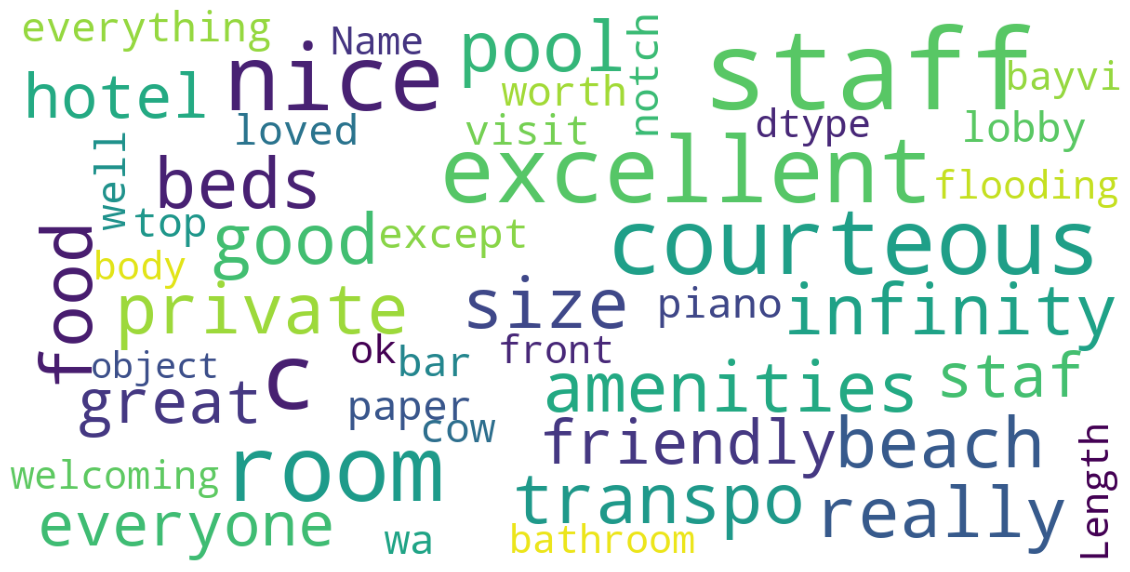

In [34]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data_eng['body'])